# Defining the nature and scope of the project

We will be working with a popular dataset named after the famous ship 'Titanic' which sunk in her maiden voyage. That disaster although pathetic has taught many valuable lessons for human condition. We will explore those in our data analysis and then after cleaning and preprocessing the data we will run various classifier model to findout which one gives the best accuracy with which best parameters. For evaluation we will use accuracy score and f1_score. Then after finding the best one we will again train and predict the data with that best model and parameter. For the final model we will also evaluate using classification report and confusion matrix.

## Importing Necessary Libraries

In [1]:
from time import time
start=time()

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

## Loading dataset

In [2]:

df = pd.read_csv('train_titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Cleaning dataset

In [3]:
y=df['Survived']
X=df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], axis=1)
X

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
X['Age']= X['Age'].fillna(X['Age'].median())
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


## Preprocessing data

In [7]:

le = preprocessing.LabelEncoder()
X['Sex']= le.fit_transform(X['Sex'])
X

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,28.0,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


## Data Visualization and Analysis

In [28]:
df.value_counts("Survived")

Survived
0    549
1    342
dtype: int64

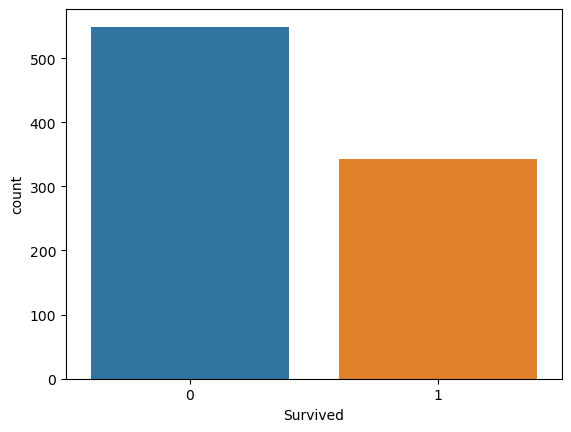

In [8]:
sns.countplot(x='Survived', data=df, )
plt.show()

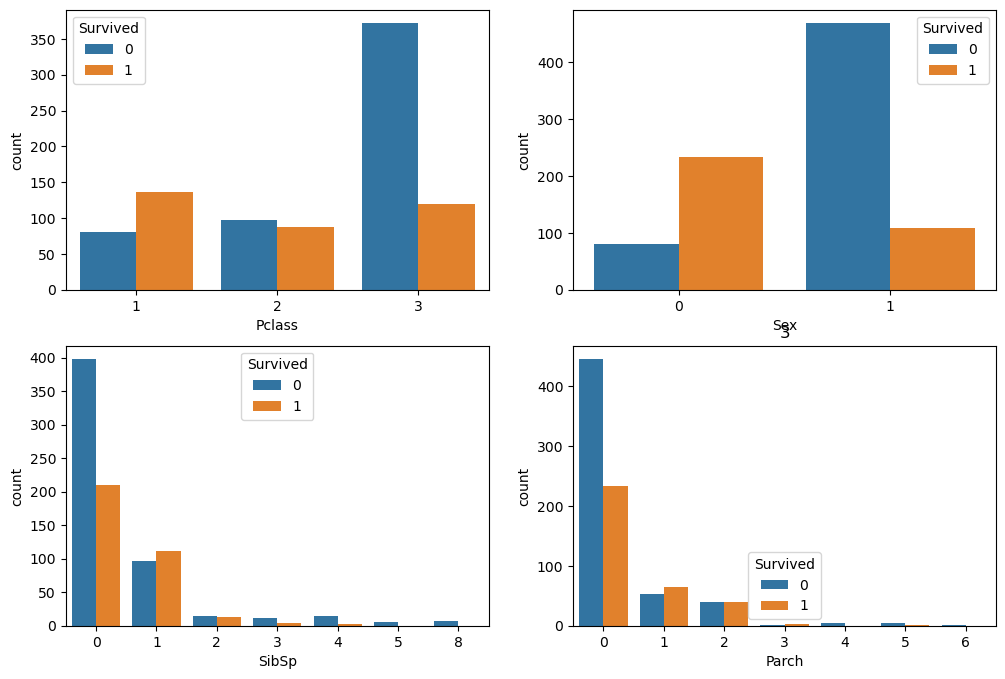

In [9]:

columns = ["Pclass","Sex","SibSp","Parch"]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs = axs.ravel()

for i, col in enumerate(columns):
    sns.countplot(data=X, x=col, ax=axs[i],hue='Survived')
    plt.title(i)
    
plt.show()

**Observatons**
1) Most people who died are from 3rd class. Most people in first class survived.

2) Mostly males died and females survived.

3) Those who had 2 or more family members had died less. Among the dead are more have no or only 1 family member present in the ship

## Final Cleaning

In [10]:
X=X.drop(['Survived'],axis=1)

In [11]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
888,3,0,28.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [12]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Splitting

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 6), (268, 6), (623,), (268,))

In [15]:
y_train.value_counts()

0    381
1    242
Name: Survived, dtype: int64

## Scaling

In [16]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


## Function to compare different models

In [17]:

# List of models to try
models = [KNeighborsClassifier(),
          GaussianNB(),
          LogisticRegression(),
          RandomForestClassifier(),
          DecisionTreeClassifier(),
          GradientBoostingClassifier(),
         ]

# Hyperparameters to try
param_grid = {'KNeighborsClassifier': {'n_neighbors': [10,12,14,16,18,20,22,24,26,28,30]},
              'GaussianNB': {'var_smoothing': [.00001,.0001,.001,0.01,0.1,1,10]},
              'LogisticRegression':{'C': [.00001,.0001,.001,0.01,0.1,1,10]},
              'RandomForestClassifier': {'n_estimators': [100, 200], 'max_depth': [80,90],'max_features': [2, 3]},
              'DecisionTreeClassifier': {'max_depth': [3, 5, 70,85]},
              'GradientBoostingClassifier': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.5, 1]}
             }


# Dataframe to store results
metrics = {'Model': [], 'ATR': [], 'ATS': [], 'F1_TR': [], 'F1_TS': [], 'B_P': []}

# Looping through models
for i, model in enumerate(models):
    mst = time()
    
    # Get model name
    model_name = str(model).replace("()","")
    # model_names.append(model_name)
    # Perform grid search with cross-validation
    gs = GridSearchCV(estimator=model, param_grid=param_grid[model_name], cv=5, n_jobs =-1)
    gs.fit(X_train, y_train)
    
    # Get best parameters
    best_params = gs.best_params_
    print(f"Best Paramenters for {model_name} is {best_params}")

    # Fit model with best parameters
    model.set_params(**best_params)
    model.fit(X_train, y_train)
    # Append in a list for future use
    # basic_models.append(model)
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate metrics
    accuracy_train = accuracy_score(y_pred_train,y_train)
    accuracy_test = accuracy_score(y_pred_test,y_test)
    f1_train=f1_score(y_pred_train,y_train)
    f1_test = f1_score(y_pred_test,y_test)
    
    # Append to DataFrame
    metrics['Model'].append(model_name)    
    metrics['ATR'].append(f"{accuracy_train:.3f}")
    metrics['ATS'].append(f"{accuracy_test:.3f}")
    metrics['F1_TR'].append(f"{f1_train:.3f}")
    metrics['F1_TS'].append(f"{f1_test:.3f}")
    metrics['B_P'].append(best_params)
    
    
    metrics_df = pd.DataFrame(metrics)
    

    print(f"{model.__class__.__name__}: accuracy_train={accuracy_train:.4f} accuracy_test={accuracy_test:.4f} f1_train={f1_train:.4f}, f1_test = {f1_test:.4f}")
    met = time()
    mrt = met-mst
    minute=int(mrt/60)
    second=mrt%60
    if minute>=60:
        hour=int(minute/60)
        minute=minute%60
        print(f"Total execution time for {model.__class__.__name__} is : {mrt}'.")
        print(f"Which translates to: {hour} hours {minute} minutes and {second:.3f} seconds.")
    else:
        print(f"Total execution time for {model.__class__.__name__} is : {mrt}'.")
        print(f"Which translates to: {minute} minutes and {second:.3f} seconds.")
    print()

Best Paramenters for KNeighborsClassifier is {'n_neighbors': 18}
KNeighborsClassifier: accuracy_train=0.8283 accuracy_test=0.8209 f1_train=0.7679, f1_test = 0.7500

Best Paramenters for GaussianNB is {'var_smoothing': 0.1}
GaussianNB: accuracy_train=0.7929 accuracy_test=0.7836 f1_train=0.7202, f1_test = 0.7129

Best Paramenters for LogisticRegression is {'C': 0.01}
LogisticRegression: accuracy_train=0.8042 accuracy_test=0.8022 f1_train=0.7215, f1_test = 0.7135

Best Paramenters for RandomForestClassifier is {'max_depth': 90, 'max_features': 3, 'n_estimators': 200}
RandomForestClassifier: accuracy_train=0.9791 accuracy_test=0.8321 f1_train=0.9727, f1_test = 0.7594

Best Paramenters for DecisionTreeClassifier is {'max_depth': 3}
DecisionTreeClassifier: accuracy_train=0.8363 accuracy_test=0.8209 f1_train=0.7743, f1_test = 0.7551

Best Paramenters for GradientBoostingClassifier is {'learning_rate': 0.1, 'n_estimators': 100}
GradientBoostingClassifier: accuracy_train=0.9069 accuracy_test=0.

## [10] Representing the findings in a table and sorting out the best model with parameters

In [18]:
# Create a PrettyTable object
table = PrettyTable()

# Add columns to the table
table.add_column("Model Name", metrics['Model'])
table.add_column("Accu_train",metrics['ATR'])
table.add_column("Accu_test",metrics['ATS'])
table.add_column("F1_train",metrics['F1_TR'])
table.add_column("F1_test",metrics['F1_TS'])
table.add_column("Best parameters",metrics['B_P'])

# Set the alignment of the columns
# table.align["Model"] = "l"
# table.align["MAE"] = "r"
# table.align["MSE"] = "r"
# table.align["R2"] = "r"
# table.align["Adjusted R2"] = "r"

print(table)

+----------------------------+------------+-----------+----------+---------+-----------------------------------------------------------+
|         Model Name         | Accu_train | Accu_test | F1_train | F1_test |                      Best parameters                      |
+----------------------------+------------+-----------+----------+---------+-----------------------------------------------------------+
|    KNeighborsClassifier    |   0.828    |   0.821   |  0.768   |  0.750  |                    {'n_neighbors': 18}                    |
|         GaussianNB         |   0.793    |   0.784   |  0.720   |  0.713  |                   {'var_smoothing': 0.1}                  |
|     LogisticRegression     |   0.804    |   0.802   |  0.721   |  0.714  |                        {'C': 0.01}                        |
|   RandomForestClassifier   |   0.979    |   0.832   |  0.973   |  0.759  | {'max_depth': 90, 'max_features': 3, 'n_estimators': 200} |
|   DecisionTreeClassifier   |   0.836   

In [19]:
best=metrics_df.sort_values(by = ['ATR','F1_TR'], ascending=False).set_index('Model')
print(best)
print()
print(f"Best Model is : \033[1m{best.index[0]}\033[0m with the best parameters : \033[1m{best.iloc[0,-1]}\033[0m")

                              ATR    ATS  F1_TR  F1_TS  \
Model                                                    
RandomForestClassifier      0.979  0.832  0.973  0.759   
GradientBoostingClassifier  0.907  0.825  0.873  0.759   
DecisionTreeClassifier      0.836  0.821  0.774  0.755   
KNeighborsClassifier        0.828  0.821  0.768  0.750   
LogisticRegression          0.804  0.802  0.721  0.714   
GaussianNB                  0.793  0.784  0.720  0.713   

                                                                          B_P  
Model                                                                          
RandomForestClassifier      {'max_depth': 90, 'max_features': 3, 'n_estima...  
GradientBoostingClassifier        {'learning_rate': 0.1, 'n_estimators': 100}  
DecisionTreeClassifier                                       {'max_depth': 3}  
KNeighborsClassifier                                      {'n_neighbors': 18}  
LogisticRegression                                     

## Finalizing the model with best results

In [20]:
final = RandomForestClassifier()
final.set_params(**best.iloc[0,-1])
final.fit(X_train, y_train)

y_pred_train =final.predict(X_train)
y_pred_test = final.predict(X_test)

## Classification Report

In [21]:
y_train.value_counts()

0    381
1    242
Name: Survived, dtype: int64

In [22]:
print(classification_report(y_pred_train,y_train,target_names=['Not_Survived','Survived']))

              precision    recall  f1-score   support

Not_Survived       0.99      0.98      0.98       386
    Survived       0.96      0.98      0.97       237

    accuracy                           0.98       623
   macro avg       0.98      0.98      0.98       623
weighted avg       0.98      0.98      0.98       623



In [23]:
print(classification_report(y_pred_test,y_test,target_names=['Not_Survived','Survived']))

              precision    recall  f1-score   support

Not_Survived       0.89      0.85      0.87       177
    Survived       0.73      0.80      0.76        91

    accuracy                           0.83       268
   macro avg       0.81      0.82      0.82       268
weighted avg       0.84      0.83      0.83       268



## Confusion Matrix

<AxesSubplot:>

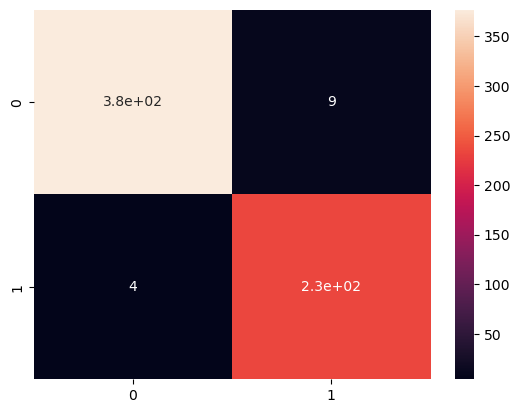

In [24]:
c= confusion_matrix(y_pred_train, y_train)
sns.heatmap(c, annot=True)

<AxesSubplot:>

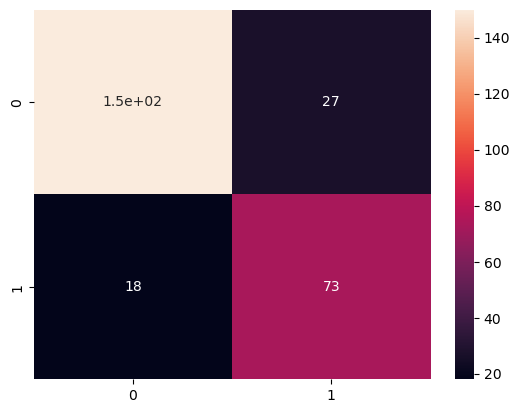

In [25]:
c= confusion_matrix(y_pred_test, y_test)
sns.heatmap(c, annot=True)

## Total Run-Time

In [26]:
end=time()
total_time=end-start
minute=int(total_time/60)
second=total_time%60
if minute>=60:
    hour=int(minute/60)
    minute=minute%60
    print('Total execution time is : {}'.format(total_time))
    print(f"Which translates to: {hour} hours {minute} minutes and {second:.3f} seconds.")
else:
    print('Total execution time is : {}'.format(total_time))
    print(f"Which translates to: {minute} minutes and {second:.3f} seconds.")

Total execution time is : 11.678731679916382
Which translates to: 0 minutes and 11.679 seconds.


## Conclusion/Summary


1) The evaluation results show that the RandomForestClassifier with parameters {'max_depth': 90, 'max_features': 3, 'n_estimators': 200} gives the best accurate result for the given data set.

2) 'Titanic' dataset teaches us that social class, gender and family members make a huge difference in surviving a disaster.
